In [251]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from mpctools.extensions import mplext, skext
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

In [2]:
data = pd.read_csv("Data\PartB\BristolAir_Exploratory.csv", compression="bz2")

In [3]:
data

,Date Time,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
0,2007-03-27 13:00:00+00:00,87.000000,28.000000,28.750000,1,51.441747,-2.559956
1,2007-03-27 14:00:00+00:00,98.500000,32.000000,32.500000,1,51.441747,-2.559956
2,2007-03-27 20:00:00+00:00,202.000000,97.750000,68.000000,6,51.427864,-2.563742
3,2007-03-28 02:00:00+00:00,107.800000,39.520000,44.520000,8,51.489993,-2.688779
4,2007-03-28 04:00:00+00:00,115.780000,31.940000,54.670000,8,51.489993,-2.688779
5,2007-03-28 07:00:00+00:00,410.500000,49.500000,218.250000,1,51.441747,-2.559956
6,2007-03-28 08:00:00+00:00,295.480000,53.350000,157.870000,8,51.489993,-2.688779
7,2007-03-28 12:00:00+00:00,129.750000,39.500000,45.500000,1,51.441747,-2.559956
8,2007-03-28 13:00:00+00:00,162.860000,69.530000,60.850000,8,51.489993,-2.688779
9,2007-03-28 13:00:00+00:00,217.750000,86.000000,86.250000,10,51.460674,-2.582253


In [4]:
data.describe()

,NOx,NO2,NO,SiteID,Loc.Lat,Loc.Long
count,1.191220e+06,1.188426e+06,1.197536e+06,1.306758e+06,1.306758e+06,1.306758e+06
mean,1.200819e+02,4.493445e+01,4.956930e+01,8.411554e+00,5.145213e+01,-2.580516e+00
std,1.428863e+02,3.183197e+01,7.645375e+01,5.329009e+00,1.607845e-02,2.738316e-02
min,-3.108000e+01,-6.669844e+00,-1.771000e+01,0.000000e+00,5.142786e+01,-2.688779e+00
25%,3.550000e+01,2.200000e+01,7.000000e+00,4.000000e+00,5.144175e+01,-2.592724e+00
50%,7.300000e+01,3.800000e+01,2.200000e+01,7.000000e+00,5.145543e+01,-2.582253e+00
75%,1.450000e+02,5.950000e+01,5.700000e+01,1.400000e+01,5.146067e+01,-2.562714e+00
max,2.164250e+03,5.765000e+02,1.231250e+03,1.700000e+01,5.148999e+01,-2.535230e+00


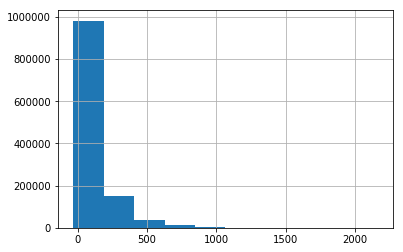

In [5]:
data.NOx.hist()

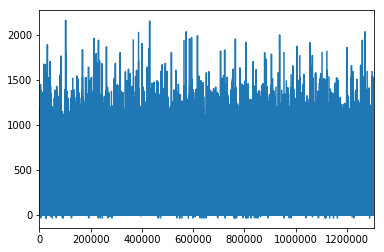

In [6]:
data.NOx.plot()

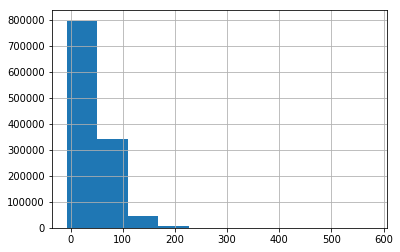

In [7]:
data.NO2.hist()

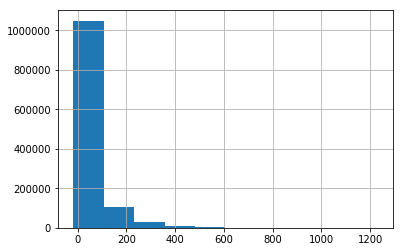

In [8]:
data.NO.hist()

In [9]:
(data.NO<0).sum()

542

In [10]:
data_gp = data.groupby(by="SiteID")

In [11]:
result = pd.DataFrame(data_gp.apply(lambda x:x.shape[0]))
result["SiteID"] = result.index
result = result.rename(columns={0:"Count"})
result = result[["SiteID", "Count"]]
result

,SiteID,Count
SiteID,,
0,0,6446
1,1,163111
2,2,62990
3,3,25464
4,4,74787
5,5,113952
6,6,142141
7,7,115162
8,8,43824


In [12]:
def missing(x):
    length = x.shape[0]
    number = (x.NOx.isnull() | x.NO2.isnull() | x.NO.isnull()).sum()
    return number/length
def negative(x):
    length = x.shape[0]
    number = ( (x.NOx<0) | (x.NO2<0) | (x.NO<0)).sum()
    return number/length

In [13]:
result["Negative"] = data_gp.apply(negative)
result["Missing"] = data_gp.apply(missing)

In [14]:
print(result.to_latex(index=False))

\begin{tabular}{rrrr}
\toprule
 SiteID &   Count &  Negative &   Missing \\
      0 &    6446 &  0.000000 &  0.016134 \\
\midrule
      1 &  163111 &  0.000000 &  0.062902 \\
      2 &   62990 &  0.000048 &  0.043483 \\
      3 &   25464 &  0.007776 &  0.773327 \\
      4 &   74787 &  0.000053 &  0.020685 \\
      5 &  113952 &  0.000000 &  0.088283 \\
      6 &  142141 &  0.000028 &  0.074440 \\
      7 &  115162 &  0.002779 &  0.041950 \\
      8 &   43824 &  0.000000 &  0.210570 \\
      9 &   22071 &  0.000000 &  0.053011 \\
     10 &   96407 &  0.000041 &  0.035900 \\
     11 &   20693 &  0.000870 &  0.019040 \\
     12 &   45240 &  0.000000 &  0.174845 \\
     13 &   12423 &  0.000161 &  0.514610 \\
     14 &  113951 &  0.000000 &  0.105317 \\
     15 &    2712 &  0.000000 &  1.000000 \\
     16 &  154331 &  0.000136 &  0.065308 \\
     17 &   91053 &  0.000022 &  0.062711 \\
\bottomrule
\end{tabular}



In [15]:
result

,SiteID,Count,Negative,Missing
SiteID,,,,
0,0,6446,0.000000,0.016134
1,1,163111,0.000000,0.062902
2,2,62990,0.000048,0.043483
3,3,25464,0.007776,0.773327
4,4,74787,0.000053,0.020685
5,5,113952,0.000000,0.088283
6,6,142141,0.000028,0.074440
7,7,115162,0.002779,0.041950
8,8,43824,0.000000,0.210570


In [16]:
new_data = data[(data.SiteID!=3) & (data.SiteID!=15)]

In [17]:
corrs = new_data[["NOx","NO2", "NO"]].corr(method="pearson")
print(corrs.to_latex(float_format="%.3f"))

\begin{tabular}{lrrr}
\toprule
{} &   NOx &   NO2 &    NO \\
\midrule
NOx & 1.000 & 0.878 & 0.988 \\
NO2 & 0.878 & 1.000 & 0.808 \\
NO  & 0.988 & 0.808 & 1.000 \\
\bottomrule
\end{tabular}



In [18]:
data_sitealigned = pd.read_csv("Data/PartB/BristolAir_SiteAligned.csv", 
                               header=[0,1], compression="bz2", parse_dates=[0])
data_sitealigned.drop(columns=["Date Time"], inplace=True)

C:\tools\Anaconda3\lib\site-packages\pandas\core\generic.py:3812: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  new_axis = axis.drop(labels, errors=errors)


In [19]:
data_sitealigned.shape

(14895, 30)

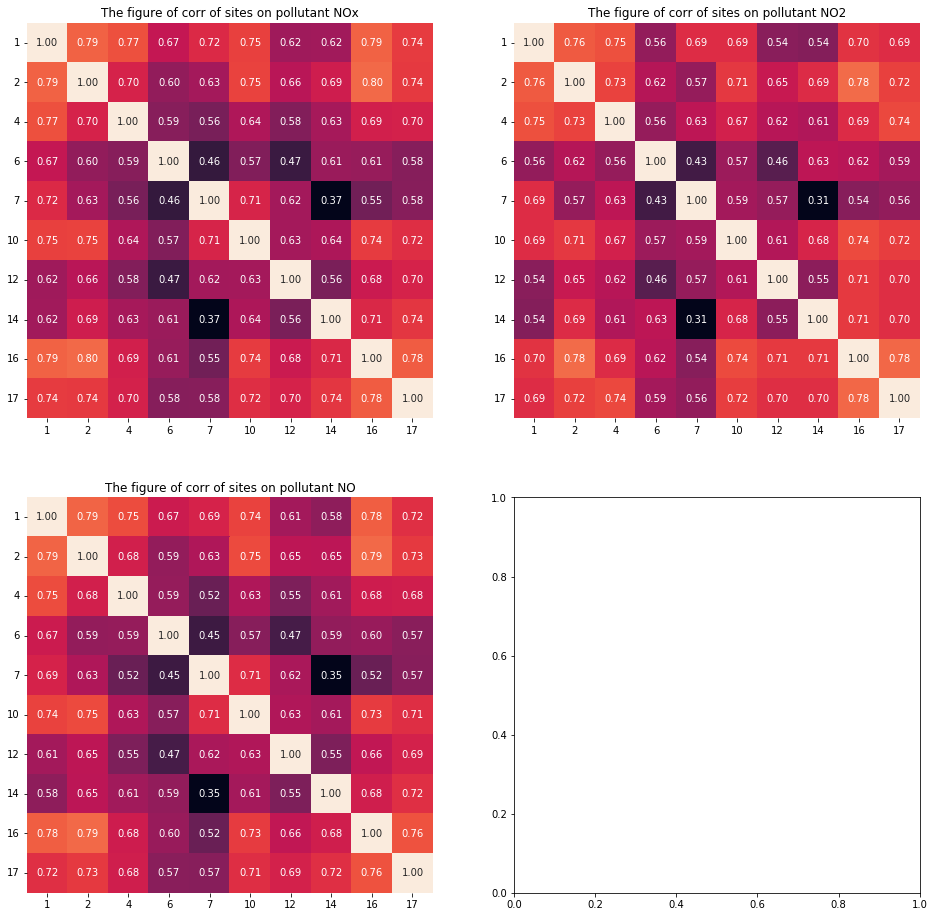

In [20]:
fig, axes = plt.subplots(2,2, figsize=(16,16))
for column, axes in zip(["NOx", "NO2", "NO"], axes.flatten()):
    mplext.plot_matrix(data_sitealigned[column].corr().values, ax =axes, mode="heatmap", 
                   cbar=False, show_val=True, labels=data_sitealigned[column].columns)
    axes.set_title("The figure of corr of sites on pollutant %s"%column)
plt.savefig("Figure_1.jpg")
plt.show()

In [21]:
data_sitealigned["NOx"].corr()

,1,2,4,6,7,10,12,14,16,17
1,1.000000,0.790952,0.768484,0.672527,0.715104,0.749820,0.618107,0.621579,0.790794,0.741468
2,0.790952,1.000000,0.703864,0.599381,0.626590,0.751528,0.656468,0.690948,0.802339,0.738754
4,0.768484,0.703864,1.000000,0.585420,0.561669,0.641436,0.578020,0.629497,0.694518,0.701558
6,0.672527,0.599381,0.585420,1.000000,0.457004,0.573486,0.467043,0.611445,0.607887,0.582451
7,0.715104,0.626590,0.561669,0.457004,1.000000,0.706425,0.624555,0.368678,0.552963,0.583912
10,0.749820,0.751528,0.641436,0.573486,0.706425,1.000000,0.627573,0.638349,0.741246,0.722625
12,0.618107,0.656468,0.578020,0.467043,0.624555,0.627573,1.000000,0.564069,0.682349,0.703402
14,0.621579,0.690948,0.629497,0.611445,0.368678,0.638349,0.564069,1.000000,0.713508,0.735480
16,0.790794,0.802339,0.694518,0.607887,0.552963,0.741246,0.682349,0.713508,1.000000,0.783519
17,0.741468,0.738754,0.701558,0.582451,0.583912,0.722625,0.703402,0.735480,0.783519,1.000000


## Question 5: Principal Component Analysis

In [25]:
data_dayaligned = pd.read_csv("Data/PartB/BristolAir_DayAligned.csv",
            index_col=[0,1], compression="bz2")
data_dayaligned.shape

(27217, 72)

In [34]:
data_dayaligned.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60',
       '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71'],
      dtype='object')

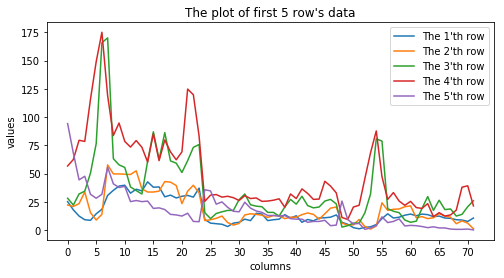

In [55]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(111)
ax.xaxis.set_ticks(np.arange(0,75, 5))
for i in range(5):
    ax.plot(data_dayaligned.iloc[i], label="The %d'th row"%(i+1))
ax.legend()
ax.set(xlabel="columns",
       ylabel="values",
       title = "The plot of first 5 row's data")
plt.savefig("Figure_2.jpg")
plt.show()

In [63]:
data_site_1 = data_dayaligned.loc[1]

In [66]:
pca = PCA(n_components=72, random_state=0)
pca.fit(data_site_1)

PCA(copy=True, iterated_power='auto', n_components=72, random_state=0,
    svd_solver='auto', tol=0.0, whiten=False)

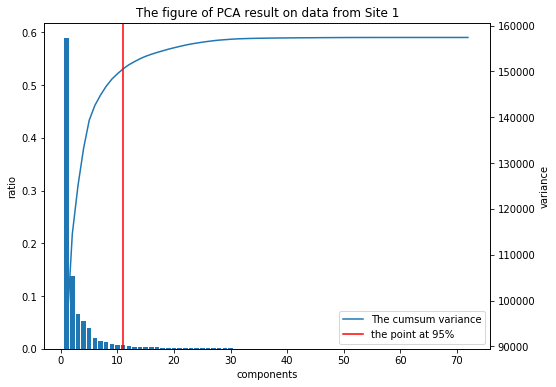

In [94]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
ax.bar(range(1,73),pca.explained_variance_ratio_)
ax.set(xlabel="components",
       ylabel="ratio")
ax_ = ax.twinx()
variances = np.cumsum(pca.explained_variance_)
ax_.plot(range(1,73),variances, label="The cumsum variance")
threshold = variances[-1]*0.95
idx = 0
while variances[idx]<threshold:
    idx += 1
ax_.axvline(x=idx+1, c="r",label="the point at 95%")
ax_.set(ylabel="variance")
plt.legend()
plt.title("The figure of PCA result on data from Site 1")
plt.savefig("Figure_3.jpg")
plt.show()

In [110]:
mean_ = pca.mean_.reshape(-1, 24)
components_ = pca.components_.reshape(72,-1,24)

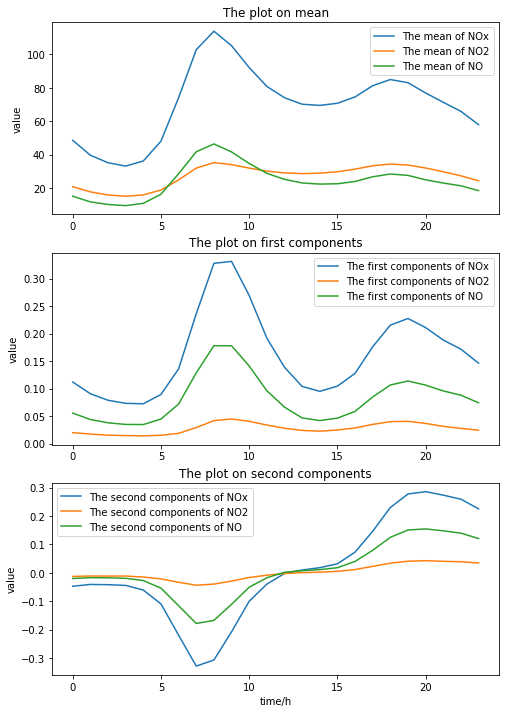

In [121]:
fig = plt.figure(figsize=(8,12))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

axes = (ax1,ax2,ax3)
vals = (mean_, components_[0], components_[1])
names = ("mean", "first components", "second components")
for i in range(3):
    ax = axes[i]
    val = vals[i]
    name = names[i]
    for i,pol in enumerate(["NOx", "NO2", "NO"]):
        ax.plot(val[i], label="The %s of %s"%(name,pol))
        ax.set(ylabel="value",
               title="The plot on %s"%name)
    ax.legend()
plt.xlabel("time/h")
plt.savefig("Figure_4.jpg")
plt.show()

## Question 6: Regression

In [130]:
data_sitealigned = pd.read_csv("Data/PartB/BristolAir_SiteAligned.csv", 
                               header=[0,1], compression="bz2", parse_dates=[0])
dataset = data_sitealigned["NOx"]
train_cols = [col for col in dataset if col!="17"]
train_cols

['1', '2', '4', '6', '7', '10', '12', '14', '16']

In [131]:
X, y = dataset[train_cols], dataset["17"]

In [136]:
train_idx, valid_idx, test_idx = skext.multi_way_split(y, (0.6,0.15,0.25),splitter=ShuffleSplit, random_state=0)

In [144]:
train_X, train_y = X.iloc[train_idx], y[train_idx]
valid_X, valid_y = X.iloc[valid_idx], y[valid_idx]
test_X, test_y = X.iloc[test_idx], y[test_idx]

In [146]:
print("The size of training set is %d."%len(train_idx))
print("The size of validation set is %d."%len(valid_idx))
print("The size of testing set is %d."%len(test_idx))

The size of training set is 8937.
The size of validation set is 2234.
The size of testing set is 3724.


In [150]:
lr = LinearRegression()

In [188]:
predict_y = 98.320413
lr = 1e-4

In [199]:
for i in range(10000):
    loss = np.sum(np.square(train_y.values-predict_y))/len(train_y)
    gradient = np.sum(-2*(train_y.values-predict_y))/len(train_y)
    if i%100==0:
        print("The loss at step %d is %.4f"%(i, loss))
    predict_y -= lr*gradient

The loss at step 0 is 6354.2973
The loss at step 100 is 6354.2973
The loss at step 200 is 6354.2973
The loss at step 300 is 6354.2973
The loss at step 400 is 6354.2973
The loss at step 500 is 6354.2973
The loss at step 600 is 6354.2973
The loss at step 700 is 6354.2973
The loss at step 800 is 6354.2973
The loss at step 900 is 6354.2973
The loss at step 1000 is 6354.2973
The loss at step 1100 is 6354.2973
The loss at step 1200 is 6354.2973
The loss at step 1300 is 6354.2973
The loss at step 1400 is 6354.2973
The loss at step 1500 is 6354.2973
The loss at step 1600 is 6354.2973
The loss at step 1700 is 6354.2973
The loss at step 1800 is 6354.2973
The loss at step 1900 is 6354.2973
The loss at step 2000 is 6354.2973
The loss at step 2100 is 6354.2973
The loss at step 2200 is 6354.2973
The loss at step 2300 is 6354.2973
The loss at step 2400 is 6354.2973
The loss at step 2500 is 6354.2973
The loss at step 2600 is 6354.2973
The loss at step 2700 is 6354.2973
The loss at step 2800 is 6354.29

In [200]:
predict_y

98.32057849288594

In [202]:
loss = np.sum(np.square(valid_y.values-predict_y))/len(valid_y)
loss

6432.842519635555

In [209]:
train_y.mean()

98.32057849390176

### ========== 6.3 ==========

In [217]:
lr = LinearRegression(normalize=False)
lr.fit(train_X, train_y)
print("The RMSE on training set is %.2f."%mean_squared_error(train_y, lr.predict(train_X)))
print("The RMSE on validation set is %.2f."%mean_squared_error(valid_y, lr.predict(valid_X)))
lr.coef_

The RMSE on training set is 1586.80.
The RMSE on validation set is 1691.46.


array([ 0.11555569,  0.00994714,  0.13413921, -0.00679908,  0.05938753,
        0.0797791 ,  0.12910957,  0.09450729,  0.16182776])

### ========== 6.5 ==========

In [224]:
lr = LinearRegression(normalize=True)
lr.fit(train_X, train_y)
print("The RMSE on training set is %.2f."%mean_squared_error(train_y, lr.predict(train_X)))
print("The RMSE on validation set is %.2f."%mean_squared_error(valid_y, lr.predict(valid_X)))
tb = pd.DataFrame(lr.coef_.reshape(1,-1),columns=train_X.columns)
print(tb.to_latex(index=False, float_format="%.4f"))

The RMSE on training set is 1586.80.
The RMSE on validation set is 1691.46.
\begin{tabular}{rrrrrrrrr}
\toprule
     1 &      2 &      4 &       6 &      7 &     10 &     12 &     14 &     16 \\
\midrule
0.1156 & 0.0099 & 0.1341 & -0.0068 & 0.0594 & 0.0798 & 0.1291 & 0.0945 & 0.1618 \\
\bottomrule
\end{tabular}



### ========== 6.6 ==========

In [227]:
knr = KNeighborsRegressor(n_jobs=-1)
knr.fit(train_X, train_y)
print("The RMSE of KNN on training set is %.2f."%mean_squared_error(train_y, knr.predict(train_X)))
print("The RMSE of KNN on validation set is %.2f."%mean_squared_error(valid_y, knr.predict(valid_X)))

The RMSE of kNN on training set is 1052.13.
The RMSE of kNN on validation set is 1624.67.


### ========== 6.7 ==========

In [263]:
k_vals = [2,4,8,16,32]
train_loss, valid_loss = list(), list()
for k in k_vals:
    knr = KNeighborsRegressor(n_jobs=-1,n_neighbors=k)
    knr.fit(train_X, train_y)
    train_loss.append(mean_squared_error(train_y, knr.predict(train_X)))
    valid_loss.append(mean_squared_error(valid_y, knr.predict(valid_X)))

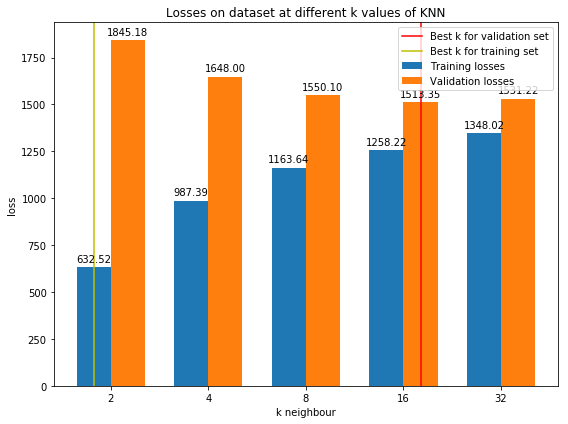

In [264]:
x = np.arange(len(k_vals))
width = 0.35
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x-width/2, train_loss, width, label="Training losses")
rects2 = ax.bar(x+width/2, valid_loss, width, label="Validation losses")
ax.axvline(3+width/2, c="r", label="Best k for validation set")
ax.axvline(0-width/2, c="y", label="Best k for training set")
ax.set(xlabel="k neighbour",
       ylabel="loss",
       title="Losses on dataset at different k values of KNN")
ax.set_xticks(x)
ax.set_xticklabels(k_vals)
ax.legend()
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate("%.2f"%height,
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig("Figure_5.jpg")
plt.show()

### ========== 6.9 ==========

In [265]:
depths = [2,4,8,16,32,64]
train_loss, valid_loss = list(), list()
for depth in depths:
    dtr = DecisionTreeRegressor(max_depth=depth, random_state=0)
    dtr.fit(train_X, train_y)
    train_loss.append(mean_squared_error(train_y, dtr.predict(train_X)))
    valid_loss.append(mean_squared_error(valid_y, dtr.predict(valid_X)))

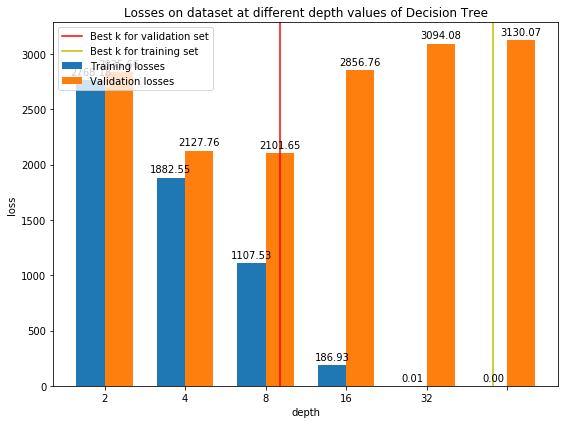

In [266]:
x = np.arange(len(depths))
width = 0.35
fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(x-width/2, train_loss, width, label="Training losses")
rects2 = ax.bar(x+width/2, valid_loss, width, label="Validation losses")
min_idx = valid_loss.index(min(valid_loss))
ax.axvline(min_idx+width/2, c="r", label="Best k for validation set")
min_idx = train_loss.index(min(train_loss))
ax.axvline(min_idx-width/2, c="y", label="Best k for training set")
ax.set(xlabel="depth",
       ylabel="loss",
       title="Losses on dataset at different depth values of Decision Tree")
ax.set_xticks(x)
ax.set_xticklabels(k_vals)
ax.legend()
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.savefig("Figure_6.jpg")
plt.show()

### ========== 6.11 ==========

In [269]:
total_X = pd.concat([train_X, valid_X], axis=0)
total_y = pd.concat([train_y, valid_y])

In [274]:
mean_val = total_y.mean()

In [276]:
lr = LinearRegression()
lr.fit(total_X, total_y)
knr = KNeighborsRegressor(n_jobs=-1, n_neighbors=16)
knr.fit(total_X, total_y)
dtr = DecisionTreeRegressor(max_depth=8)
dtr.fit(total_X, total_y)
losses = [mean_squared_error(total_y, [mean_val]*len(total_y)),
          mean_squared_error(total_y, lr.predict(total_X)),
          mean_squared_error(total_y, knr.predict(total_X)),
          mean_squared_error(total_y, dtr.predict(total_X))]

In [281]:
model_res = pd.DataFrame([losses], columns=["Baseline", "LR", "KNN", "DT"], index=["losses"])
print(model_res.to_latex(float_format="%.2f"))

\begin{tabular}{lrrrr}
\toprule
{} &  Baseline &      LR &     KNN &      DT \\
\midrule
losses &   6369.91 & 1606.99 & 1264.59 & 1146.16 \\
\bottomrule
\end{tabular}

